In [8]:
using CategoricalArrays


using CSV, DataFrames, Random, Statistics, Plots
using Primes
using DecisionTree, Impute
using Base.Threads

using Distributed



In [12]:
df = CSV.read("G:/Mi unidad/01-Maestria Ciencia de Datos/DMEyF/TPs/dmeyf-2024/datasets/competencia_01_julia.csv", DataFrame)

Row,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,cproductos,tcuentas,ccuenta_corriente,mcuenta_corriente_adicional,mcuenta_corriente,ccaja_ahorro,mcaja_ahorro,mcaja_ahorro_adicional,mcaja_ahorro_dolares,cdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cinversion1,minversion1_pesos,minversion1_dolares,cinversion2,minversion2,cseguro_vida,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,cpayroll_trx,mpayroll,mpayroll2,cpayroll2_trx,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ctarjeta_master_debitos_automaticos,mttarjeta_master_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,cforex,cforex_buy,mforex_buy,cforex_sell,mforex_sell,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,ccajas_transacciones,ccajas_consultas,⋯
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Float64,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Float64,Int64,Float64,Float64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64?,Int64,Float64?,Int64,Float64,Int64,Float64,Int64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,249221109,202101,1,0,0,61,300,1664.94,17994.4,1605.81,-312.22,362.63,8,1,1,0.0,-388.19,2,19053.6,0.0,41244.0,1,71493.9,4,2,7489.49,1,11,1.19804e5,1,17,30487.5,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,1,1,0,2,140760.0,0.0,0,6,29690.9,6,6457.15,8,8026.47,0,0.0,2,12552.8,0,0.0,0,0.0,0,0.0,0,0.0,16,1605.81,0,0,0.0,0,0.0,6,112608.0,3,30074.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1,116,1,0,⋯
2,249221109,202102,1,0,0,61,301,1002.92,18337.3,1312.91,-680.6,416.33,8,1,1,0.0,0.0,2,85292.1,0.0,15618.2,1,1.06266e5,4,1,1540.14,1,14,30112.8,1,12,23743.9,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,1,1,0,1,117300.0,0.0,0,9,40316.5,6,6819.61,6,7000.13,0,0.0,2,12601.7,0,0.0,0,0.0,0,0.0,0,0.0,16,1312.91,0,0,0.0,0,0.0,7,340170.0,6,2.24049e5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1,148,1,1,⋯
3,249221109,202103,1,0,0,61,302,769.74,18596.6,1662.56,-1434.51,673.37,8,1,1,0.0,-485.88,2,60819.0,0.0,6839.68,1,66573.8,4,1,2302.59,1,9,10918.1,1,13,36506.2,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,1,1,0,2,234600.0,0.0,0,15,54609.3,5,6969.05,7,7793.81,0,0.0,2,21707.1,0,0.0,1,182.3,3,4035.33,0,0.0,14,1662.56,0,0,0.0,0,0.0,6,209967.0,6,3.31177e5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1,112,1,0,⋯
4,249221109,202104,1,0,0,62,303,1532.79,19935.0,1899.52,-1302.36,989.72,8,1,1,0.0,0.0,2,59658.8,0.0,76458.1,1,193551.0,4,2,10178

In [2]:
println("Columnas del DataFrame:")
println(names(df))

Columnas del DataFrame:
["numero_de_cliente", "foto_mes", "active_quarter", "cliente_vip", "internet", "cliente_edad", "cliente_antiguedad", "mrentabilidad", "mrentabilidad_annual", "mcomisiones", "mactivos_margen", "mpasivos_margen", "cproductos", "tcuentas", "ccuenta_corriente", "mcuenta_corriente_adicional", "mcuenta_corriente", "ccaja_ahorro", "mcaja_ahorro", "mcaja_ahorro_adicional", "mcaja_ahorro_dolares", "cdescubierto_preacordado", "mcuentas_saldo", "ctarjeta_debito", "ctarjeta_debito_transacciones", "mautoservicio", "ctarjeta_visa", "ctarjeta_visa_transacciones", "mtarjeta_visa_consumo", "ctarjeta_master", "ctarjeta_master_transacciones", "mtarjeta_master_consumo", "cprestamos_personales", "mprestamos_personales", "cprestamos_prendarios", "mprestamos_prendarios", "cprestamos_hipotecarios", "mprestamos_hipotecarios", "cplazo_fijo", "mplazo_fijo_dolares", "mplazo_fijo_pesos", "cinversion1", "minversion1_pesos", "minversion1_dolares", "cinversion2", "minversion2", "cseguro_vida",

In [14]:
# Contar y mostrar las columnas que tienen valores missing
missing_count = filter(col -> any(ismissing, df[!, col]), names(df))
for col in missing_count
    println("Columna: $col, Missing: $(count(ismissing, df[!, col]))")
end

Columna: mtarjeta_visa_descuentos, Missing: 16998
Columna: mtarjeta_master_descuentos, Missing: 23521
Columna: Master_delinquency, Missing: 101319
Columna: Master_status, Missing: 101319
Columna: Master_mfinanciacion_limite, Missing: 101319
Columna: Master_Fvencimiento, Missing: 101319
Columna: Master_Finiciomora, Missing: 977048
Columna: Master_msaldototal, Missing: 101319
Columna: Master_msaldopesos, Missing: 101319
Columna: Master_msaldodolares, Missing: 101319
Columna: Master_mconsumospesos, Missing: 586300
Columna: Master_mconsumosdolares, Missing: 586300
Columna: Master_mlimitecompra, Missing: 101319
Columna: Master_madelantopesos, Missing: 586300
Columna: Master_madelantodolares, Missing: 586300
Columna: Master_fultimo_cierre, Missing: 101770
Columna: Master_mpagado, Missing: 101319
Columna: Master_mpagospesos, Missing: 586300
Columna: Master_mpagosdolares, Missing: 586300
Columna: Master_fechaalta, Missing: 101319
Columna: Master_mconsumototal, Missing: 586300
Columna: Master_c

In [4]:
# Identificar columnas con un solo valor único
same_value_columns = filter(col -> length(unique(df[!, col])) == 1, names(df))

println("Columnas con el mismo valor en todos los registros:")
println(same_value_columns)

Columnas con el mismo valor en todos los registros:
String[]


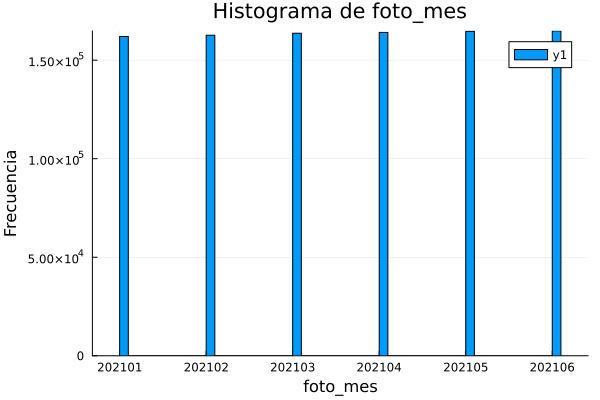

In [10]:
# Crear el histograma de la columna foto_mes
histogram(df.foto_mes, title="Histograma de foto_mes", xlabel="foto_mes", ylabel="Frecuencia")


In [15]:

dataset = copy(df)
# Supongamos que dataset es tu DataFrame
# Convertir la columna 'clase_ternaria' a valores numéricos
dataset.clase_ternaria_num = Int.(CategoricalArray(dataset.clase_ternaria))

# Calcular la correlación entre cada columna numérica y 'clase_ternaria_num'
correlaciones = Dict()
for col in names(dataset)
    if eltype(dataset[!, col]) <: Number && col != :clase_ternaria_num
        correlaciones[col] = cor(dataset[!, col], dataset.clase_ternaria_num)
    end
end

# Mostrar las correlaciones
println("Correlaciones con clase_ternaria_num:")
for (col, corr) in correlaciones
    println("Columna: $col, Correlación: $corr")
end

# Calcular el porcentaje de correlación
correlaciones_porcentaje = Dict()
for (col, corr) in correlaciones
    correlaciones_porcentaje[col] = corr * 100
end

# Mostrar los porcentajes de correlación
println("Porcentaje de Correlación con clase_ternaria_num:")
for (col, perc) in correlaciones_porcentaje
    println("Columna: $col, Porcentaje de Correlación: $perc%")
end

MethodError: MethodError: no method matching Int64(::CategoricalValue{String15, UInt32})

Closest candidates are:
  Int64(!Matched::Float64)
   @ Base float.jl:908
  Int64(!Matched::Float32)
   @ Base float.jl:908
  Int64(!Matched::Float16)
   @ Base float.jl:908
  ...
